# Name: Shreya Sadashiva Kamath
# Github Username: shreyasa31
# USC-ID: 7553148882

## **Project: Building a classifier to analyze the sentiment of reviews using MLP, CNN, RNN**

### **b) Data Exploration and Pre-processing**

*i) Binary Encoding where positive sentiment=1 and negative sentiment=-1*

In [2]:
# Paths to your data directories
positive_review_path = './Data/pos'
negative_review_path = './Data/neg'

In [3]:
import os
import numpy as np

def data_loading(dir, label):
    texts = []
    labels = []
    filenames = []  # List to hold filenames
    for f in os.listdir(dir):
        if f.endswith(".txt"):
            # Construct the full file path
            file_path = os.path.join(dir, f)
            # Open and read the file
            with open(file_path, 'r', encoding='utf-8') as fdata:
                texts.append(fdata.read())
            labels.append(label)
            filenames.append(f)  # Store the filename
    return texts, labels, filenames

# Specify the paths to your data directories
positive_review_path = './Data/pos'
negative_review_path = './Data/neg'

# Load all data
pos_texts, pos_labels, pos_filenames = data_loading(positive_review_path, 1)  # Positive sentiment
neg_texts, neg_labels, neg_filenames = data_loading(negative_review_path, -1)  # Negative sentiment

# Combine data
texts = pos_texts + neg_texts
labels = pos_labels + neg_labels
filenames = pos_filenames + neg_filenames  # Combine filenames

# Convert labels to a numpy array for use with Keras
labels = np.array(labels)


In [4]:
labels

array([ 1,  1,  1, ..., -1, -1, -1])

In [5]:
filenames

['cv000_29590.txt',
 'cv001_18431.txt',
 'cv002_15918.txt',
 'cv003_11664.txt',
 'cv004_11636.txt',
 'cv005_29443.txt',
 'cv006_15448.txt',
 'cv007_4968.txt',
 'cv008_29435.txt',
 'cv009_29592.txt',
 'cv010_29198.txt',
 'cv011_12166.txt',
 'cv012_29576.txt',
 'cv013_10159.txt',
 'cv014_13924.txt',
 'cv015_29439.txt',
 'cv016_4659.txt',
 'cv017_22464.txt',
 'cv018_20137.txt',
 'cv019_14482.txt',
 'cv020_8825.txt',
 'cv021_15838.txt',
 'cv022_12864.txt',
 'cv023_12672.txt',
 'cv024_6778.txt',
 'cv025_3108.txt',
 'cv026_29325.txt',
 'cv027_25219.txt',
 'cv028_26746.txt',
 'cv029_18643.txt',
 'cv030_21593.txt',
 'cv031_18452.txt',
 'cv032_22550.txt',
 'cv033_24444.txt',
 'cv034_29647.txt',
 'cv035_3954.txt',
 'cv036_16831.txt',
 'cv037_18510.txt',
 'cv038_9749.txt',
 'cv039_6170.txt',
 'cv040_8276.txt',
 'cv041_21113.txt',
 'cv042_10982.txt',
 'cv043_15013.txt',
 'cv044_16969.txt',
 'cv045_23923.txt',
 'cv046_10188.txt',
 'cv047_1754.txt',
 'cv048_16828.txt',
 'cv049_20471.txt',
 'cv050_11

*ii) Removing punctuations and numbers*

In [21]:
import re

def cleaning_text(texts):
    new_texts = []
    for t in texts:
        # Remove punctuation and numbers
        t = re.sub(r'[^\w\s]', '', t)  # Remove punctuation   
        t = re.sub(r'\d', '', t)  # Remove digits
        # Append the cleaned text
        new_texts.append(t)
    return new_texts

cleaned_texts = cleaning_text(texts)


In [23]:
for line in cleaned_texts[:5]:  #here only 5 elements are used just to show that it has removed punctuation and numbers from the original texts
    print(line)

films adapted from comic books have had plenty of success  whether theyre about superheroes  batman  superman  spawn   or geared toward kids  casper  or the arthouse crowd  ghost world   but theres never really been a comic book like from hell before  
for starters  it was created by alan moore  and eddie campbell   who brought the medium to a whole new level in the mid s with a part series called the watchmen  
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd  
the book  or  graphic novel   if you will  is over  pages long and includes nearly  more that consist of nothing but footnotes  
in other words  dont dismiss this film because of its source  
if you can get past the whole comic book thing  you might find another stumbling block in from hells directors  albert and allen hughes  
getting the hughes brothers to direct this seems almost as ludicrous as casting carrot top in  well  an

*iii) Splitting test and train test in both positive and negative*

In [7]:
def split_based_on_filename(texts, labels, filenames):
    train_texts, test_texts = [], []
    train_labels, test_labels = [], []
    train_filenames, test_filenames = [], []

    for text, label, filename in zip(texts, labels, filenames):
        # Extract the number from the filename using string slicing and conversion to integer
        # Assumes filename format 'cvXXX.txt', where XXX is the numeric part
        num_part = int(filename[2:5])
        if 0 <= num_part <= 699:
            train_texts.append(text)
            train_labels.append(label)
            train_filenames.append(filename)
        elif 700 <= num_part <= 999:
            test_texts.append(text)
            test_labels.append(label)
            test_filenames.append(filename)

    return train_texts, train_labels, train_filenames, test_texts, test_labels, test_filenames


In [8]:
# Split the combined data based on filenames
print(len(filenames))  
train_data, train_labels, train_filenames, test_data, test_labels, test_filenames = split_based_on_filename(cleaned_texts, labels, filenames)


2000


In [9]:
print("Number of files in the training set:", len(train_filenames))
print("Number of files in the testing set:", len(test_filenames))

Number of files in the training set: 1400
Number of files in the testing set: 600


*iv Counting number of Unique words*

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer


combined_data=train_data+test_data

# Create a tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(combined_data)

# Count the number of unique words
unique_word_count = len(tokenizer.word_index)

print("Number of unique words in both Train and Test dataset:", unique_word_count)


Number of unique words in both Train and Test dataset: 46737


*v) Average review length and the standard deviation of review length*

In [12]:
import numpy as np

# Calculate the length of each review
review_lengths = [len(review.split()) for review in combined_data]

# Calculate the average length and standard deviation of the reviews
average_length = np.mean(review_lengths)
std_dev_length = np.std(review_lengths)

print("Average review length:", average_length)
print("Standard deviation of review lengths:", std_dev_length)


Average review length: 644.3575
Standard deviation of review lengths: 284.98012333099655


*vi) Plotting Histogram*

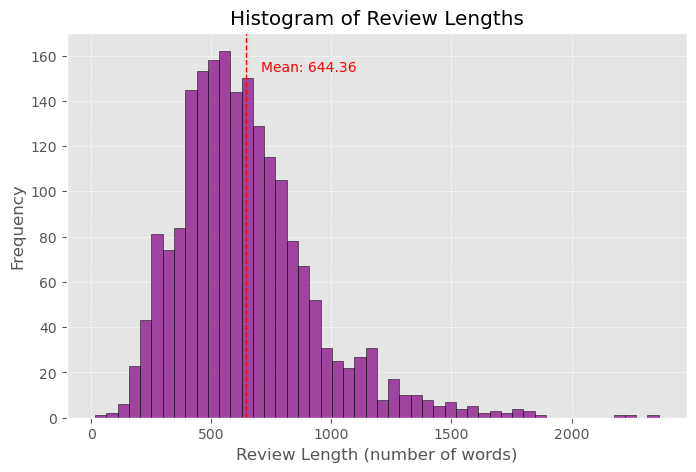

In [13]:
import matplotlib.pyplot as plt

# Set a style for the plot
plt.style.use('ggplot')  # Using 'ggplot' style for a cleaner and more modern look

# Plotting the histogram of review lengths with smaller dimensions
plt.figure(figsize=(8, 5))  # Adjusted to smaller size
plt.hist(review_lengths, bins=50, color='purple', edgecolor='black', alpha=0.7)
plt.title('Histogram of Review Lengths')
plt.xlabel('Review Length (number of words)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', linewidth=0.5)  # Adjust grid visibility and style
plt.axvline(x=np.mean(review_lengths), color='red', linestyle='dashed', linewidth=1)  # Mean line
plt.text(np.mean(review_lengths) * 1.1, plt.ylim()[1] * 0.9, 'Mean: {:.2f}'.format(np.mean(review_lengths)),
         color='red')  # Add text for mean value

plt.show()

*vii) Ranking the words*

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer

print(type(train_data))
# Create a tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(combined_data)

# Now tokenize each document
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

# Optionally, you might want to also see the word index to understand the frequency mapping
word_index = tokenizer.word_index
sample_word_index = dict(list(word_index.items())[:5]) 
print("Word Index (word: rank):",sample_word_index ) #just displayed 5 characters because the output will be very lengthy

# Displaying some tokenized sequences to verify
print("Tokenized sequences (Train):", train_sequences[0:5])  # Show first 5 sequences from training data
print("Tokenized sequences (Test):", test_sequences[0:5])  # Show first 5 sequences from testing data


<class 'list'>
Word Index (word: rank): {'the': 1, 'a': 2, 'and': 3, 'of': 4, 'to': 5}
Tokenized sequences (Train): [[67, 2745, 29, 355, 1634, 32, 90, 1047, 4, 627, 628, 321, 40, 704, 4783, 1755, 47, 1328, 396, 4949, 47, 1, 1777, 1778, 148, 16, 140, 108, 89, 68, 2, 355, 405, 39, 29, 503, 142, 12, 9, 31, 853, 21, 1352, 1802, 3, 944, 1512, 28, 879, 1, 3951, 5, 2, 282, 113, 540, 7, 1, 126, 11, 2, 202, 262, 381, 1, 5, 180, 1802, 3, 1512, 1882, 1, 845, 4, 495, 1, 69, 22, 39, 820, 325, 1231, 6, 2142, 5, 175, 2, 94, 1232, 1, 405, 47, 1549, 523, 51, 35, 65, 6, 111, 4950, 196, 3, 1233, 440, 42, 8, 4, 181, 16, 7, 73, 637, 119, 14, 15, 84, 4, 23, 2110, 51, 35, 64, 74, 403, 1, 282, 355, 405, 179, 35, 228, 188, 124, 2808, 7, 29, 880, 2858, 3, 1029, 2592, 333, 1, 2592, 620, 5, 1967, 14, 136, 178, 10, 2970, 10, 1089, 466, 7, 83, 232, 16, 103, 14, 28, 153, 5, 1967, 2, 15, 185, 260, 7, 1, 4628, 3, 629, 89, 996, 1036, 690, 58, 1, 1609, 384, 1261, 1009, 911, 1, 4628, 7, 486, 6, 4, 218, 7, 3316, 133, 23, 

*viii) Select review length that 70% of reviews have a length below it*

In [15]:
# Calculate the 70th percentile of review lengths
L_70 = np.percentile(review_lengths, 70)
print("70% of the reviews have a length below:", L_70)

# Calculate the 90th percentile of review lengths
L_90 = np.percentile(review_lengths, 90)
print("90% of the reviews have a length below:", L_90)

70% of the reviews have a length below: 737.0
90% of the reviews have a length below: 993.4000000000005


*ix) Truncate review Length*

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assume you have already decided on 'L' based on percentiles
L = int(np.percentile(review_lengths, 70))  # for example, using the 70th percentile as L

# Assuming 'train_sequences' and 'test_sequences' are already tokenized sequences of your texts
# Truncate and pad training sequences
train_padded = pad_sequences(train_sequences, maxlen=L, truncating='post', padding='post')

# Truncate and pad testing sequences
test_padded = pad_sequences(test_sequences, maxlen=L, truncating='post', padding='post')

print("Example of padded training sequence:", train_padded.shape)
print("Example of padded testing sequence:", test_padded[0])


Example of padded training sequence: (1400, 737)
Example of padded testing sequence: [ 464  103  435   99   21  820    8 1123   46    5    1  685    4    1
  751  914   15   18   89  457  302 1405    5    9   10   70   10   18
   32   11   49    4    1  739   67  223   25  269   51    9   31    1
  980 4165 2449   47    1    8    1  294   15   65  579  135   55    1
 3807  734    4    1  146  223  674    5 4522    8   87   97   81   40
    1   80  221    4    1   15   21    8  212    9   31 3435    8  407
  914   31  135   11    2   37   69   32  261   68  648   12    1  183
    8    1   80  900  221    4    1   15 1897  449    2 2649  578    9
  136    8 1709  664    1  689   30    1  590    8    1  367 2944   20
  415    5   22  710   99   43    1   27  421    9  839    2   29   24
  160 1110    5 2796   77    7   18  594   36   64   22  151  560 4395
    3   46 3882  149  306    6  532   19    1 1633  722   81 3254 2803
   48    1  737 3869   31   12   18    7   12  914   18  172   

## **c) Word Embeddings**

## **d) MultiLayer Perceptron**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Convert labels from -1 to 0
train_labels = np.where(train_labels == -1, 0, train_labels)
test_labels = np.where(test_labels == -1, 0, test_labels)
# Model definition
model = Sequential()
print(L)
model.add(Embedding(input_dim=5000, output_dim=32, input_length=L))  # Assuming L is predefined or calculated based on data
  # Flatten the matrix of each document to a vector
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))  # 20% dropout rate for the first dense layer
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))  # 50% dropout rate for subsequent layers
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


print(train_labels)

# Model compilation
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Assuming `train_padded` and `test_padded` are the padded sequences from your dataset
# Assuming `train_labels` and `test_labels` are the labels for your training and test sets
# Training the model
history = model.fit(train_padded, train_labels, epochs=2, batch_size=10, validation_data=(test_padded, test_labels))

# Report train and test accuracies
train_acc = history.history['accuracy'][-1]
test_acc = history.history['val_accuracy'][-1]
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(model.summary())


737
[1 1 1 ... 0 0 0]
Epoch 1/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.5374 - loss: 0.6939 - val_accuracy: 0.5300 - val_loss: 0.6923
Epoch 2/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5541 - loss: 0.6908 - val_accuracy: 0.5467 - val_loss: 0.6865
Train Accuracy: 0.5507
Test Accuracy: 0.5467


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (10, 737, 32)               │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (10, 737, 50)               │           1,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (10, 737, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (10, 737, 50)               │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (10, 737, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (10, 737, 50)               │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (10, 737, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (10, 36850)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (10, 1)                     │          36,851 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 610,805 (2.33 MB)

 Trainable params: 203,601 (795.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,204 (1.55 MB)

None


In [ ]:
train_padded #for my reference

In [ ]:
test_padded

In [ ]:
print("train_padded shape:", train_padded.shape)

print("test_padded shape:", test_padded.shape)


In [ ]:
len(train_labels)

In [ ]:
len(test_labels)

## **e) CNN model**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Constants for the model
MAX_WORDS = 5000  # Vocabulary size for the top 5000 words
EMBEDDING_DIM = 32  # Dimensionality of the embedding vector
MAX_LENGTH = 100   # Maximum length of input sequences
NUM_FEATURE_MAPS = 32  # Number of output channels in Conv1D
KERNEL_SIZE = 3  # Size of the convolution kernel

# Define the CNN model
cnn_model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_LENGTH),
    Conv1D(NUM_FEATURE_MAPS, KERNEL_SIZE, activation='relu'),
    MaxPooling1D(pool_size=2, strides=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),  # Assuming the structure continues similarly to the previous setup
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# Assuming train_padded, train_labels, test_padded, test_labels are already defined
history = cnn_model.fit(
    train_padded, train_labels,
    epochs=2,  # Training for 2 epochs as specified
    batch_size=10,  # Using a batch size of 10
    validation_data=(test_padded, test_labels)
)

# Extract and print the train and test accuracies to report them
train_acc = history.history['accuracy'][-1]
test_acc = history.history['val_accuracy'][-1]
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(model.summary())

Epoch 1/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5379 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 0.6901
Epoch 2/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6049 - loss: 0.6671 - val_accuracy: 0.5700 - val_loss: 0.6727
Train Accuracy: 0.6336
Test Accuracy: 0.5700


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (10, 737, 32)               │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (10, 737, 50)               │           1,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (10, 737, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (10, 737, 50)               │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (10, 737, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (10, 737, 50)               │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (10, 737, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (10, 36850)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (10, 1)                     │          36,851 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 610,805 (2.33 MB)

 Trainable params: 203,601 (795.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,204 (1.55 MB)

None


In [ ]:
#reference for myself
# import pandas as pd

# # Assuming 'combined_texts', 'train_labels', and 'filenames' are your lists
# # Create a DataFrame from the lists
# df = pd.DataFrame({
#     'Text': combined_data,
#     'Label': labels,
#     'Filename': filenames
# })

# df
# If you are using a Jupyter Notebook, simply use the following to display the DataFrame:
# display(df.head())  # For a more formatted output in Jupyter Notebooks


## **f) LSTM RNN model**

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define constants
TOP_WORDS = 5000  # Number of top words to consider in the vocabulary
MAX_WORDS = L  # Length of input sequences
EMBEDDING_DIM = 32  # Dimension of embedding vector
LSTM_UNITS = 256  # Number of units in the LSTM layer

# Model definition
model = Sequential()
model.add(Embedding(TOP_WORDS, EMBEDDING_DIM, input_length=MAX_WORDS))
model.add(LSTM(LSTM_UNITS, return_sequences=False))  # return_sequences=False since we only need the last output
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))  # Dense layer following LSTM
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to verify architecture
# print(model.summary())

# Assuming `train_padded`, `train_labels`, `test_padded`, `test_labels` are already defined
# Train the model
history = model.fit(
    train_padded, train_labels,
    epochs=50,  # Number of epochs to train (can be adjusted between 10-50 as needed)
    batch_size=10,
    validation_data=(test_padded, test_labels)
)

# Extract and report train and test accuracies
train_acc = history.history['accuracy'][-1]
test_acc = history.history['val_accuracy'][-1]
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(model.summary())

Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 128s 849ms/step - accuracy: 0.4985 - loss: 0.6945 - val_accuracy: 0.5383 - val_loss: 0.6921
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 112s 803ms/step - accuracy: 0.5129 - loss: 0.6906 - val_accuracy: 0.5383 - val_loss: 0.6887
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 113s 809ms/step - accuracy: 0.5957 - loss: 0.6570 - val_accuracy: 0.5267 - val_loss: 0.6950
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 112s 799ms/step - accuracy: 0.6323 - loss: 0.6121 - val_accuracy: 0.5233 - val_loss: 0.7348
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 57s 406ms/step - accuracy: 0.6001 - loss: 0.5750 - val_accuracy: 0.5533 - val_loss: 0.7964
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 53s 381ms/step - accuracy: 0.5940 - loss: 0.5669 - val_accuracy: 0.5250 - val_loss: 0.8184
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 55s 393ms/step - accuracy: 0.6374 - loss: 0.5460 - val_accuracy: 0.5133 - val_loss: 0.7782
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 54s 388ms/step - accuracy: 0.5950 - los

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (10, 737, 32)               │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (10, 256)                   │         295,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (10, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (10, 256)                   │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (10, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (10, 1)                     │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,565,957 (5.97 MB)

 Trainable params: 521,985 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,043,972 (3.98 MB)

None


**Here In all models we are getting less accuracy so if we tune the parameters or if we change the architecture of the model we are able to enhance the accuracy**

**References:**
* OpenAI. ChatGPT. Version 4, OpenAI, 2023. https://www.openai.com/chatgpt.
* TensorFlow. (n.d.). Convolutional Neural Network (CNN). Retrieved from https://www.tensorflow.org/tutorials/images/cnn
* GeeksforGeeks. (n.d.). Long Short-Term Memory (LSTM) – RNN in TensorFlow. Retrieved from https://www.geeksforgeeks.org/long-short-term-memory-lstm-rnn-in-tensorflow/
